# Atelier : Se familiariser avec [scikit-learn/matplotlib]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sklearn as sk




## Exercice 1 :  
Chargez le dataset Iris et réalisez une analyse exploratoire complète. Votre objectif est de comprendre la structure des données en utilisant des méthodes de visualisation et d'analyse descriptive. Affichez les premières lignes du dataset, générez des visualisations de la distribution des caractéristiques et identifiez les principales caractéristiques statistiques.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


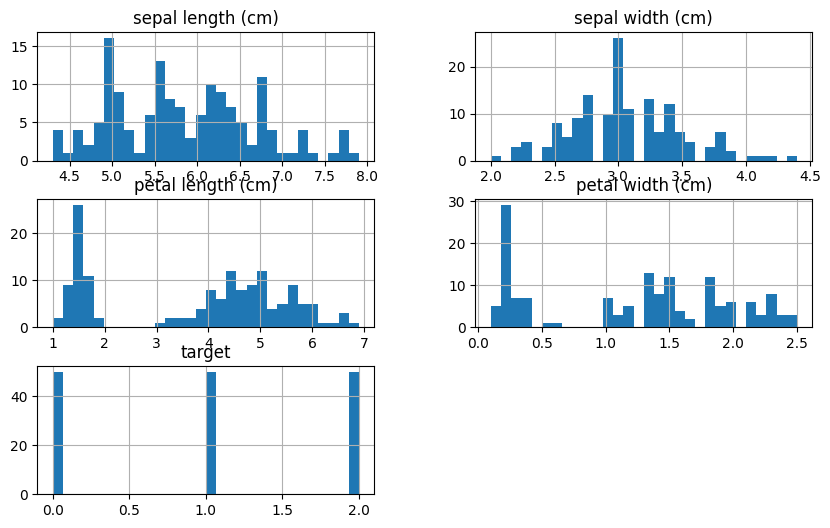

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset Iris
iris = load_iris()
x = iris.data
y = iris.target

# Créer un DataFrame
df = pd.DataFrame(x, columns=iris.feature_names)
df['target'] = y

# Afficher les premières lignes
print(df.head())

# Visualiser la distribution des caractéristiques
df.hist(bins=30, figsize=(10, 6))
df.boxplot()
plt.title("Distribution des caractéristiques - Dataset Iris")
plt.show()




## Exercice 2 :
Préparez le dataset Iris pour l'entraînement d'un modèle de machine learning. Divisez les données en jeux d'entraînement et de test en utilisant la fonction train_test_split(). Votre tâche est de séparer correctement les features (X) et le target (y), avec 30% des données réservés pour le test, tout en garantissant la reproductibilité par l'utilisation d'une graine aléatoire.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
iris = load_iris()

# Séparer les features et le target
X = iris.data
y = iris.target

# Division du dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Nombre de données dans le jeu d'entraînement : {X_train.shape}")
print(f"Nombre de données dans le jeu de test : {X_test.shape}")



Nombre de données dans le jeu d'entraînement : (105, 4)
Nombre de données dans le jeu de test : (45, 4)


## Exercice 3 : 
Construisez un modèle de classification en utilisant l'algorithme Random Forest pour prédire l'espèce de fleurs dans le dataset Iris. Entraînez le modèle sur les données de training, effectuez des prédictions sur les données de test, et évaluer ses performances. Générez un rapport de classification détaillé et une matrice de confusion pour visualiser la précision de votre modèle


In [15]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



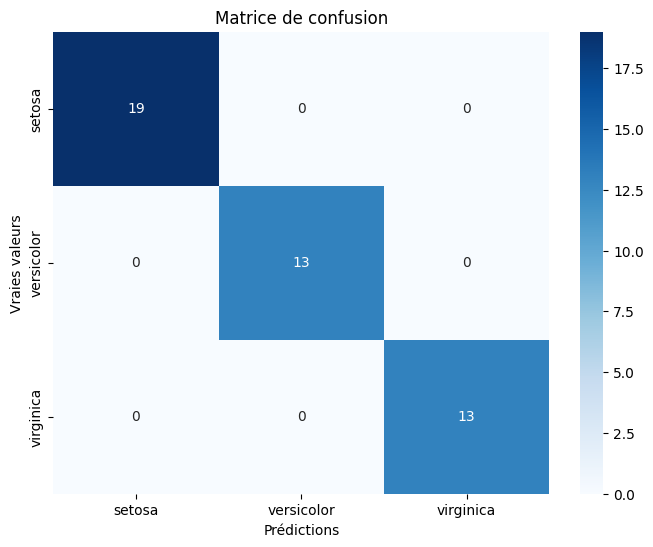

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
iris = load_iris()

# Séparer les features et le target
X = iris.data
y = iris.target

# Division du dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Évaluation du modèle
print("Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

## Exercice 4 :
Utilisez le dataset Boston Housing pour réaliser une analyse de régression linéaire. Votre mission est de prédire le prix des maisons en fonction de différentes caractéristiques. Entraînez un modèle de régression linéaire, effectuez des prédictions sur les données de test, et évaluez la performance du modèle en calculant l'erreur quadratique moyenne (MSE) et le score R². Créez une visualisation comparative entre les prix réels et les prix prédits.


Erreur quadratique moyenne: 0.5305677824766757
Score R²: 0.595770232606166


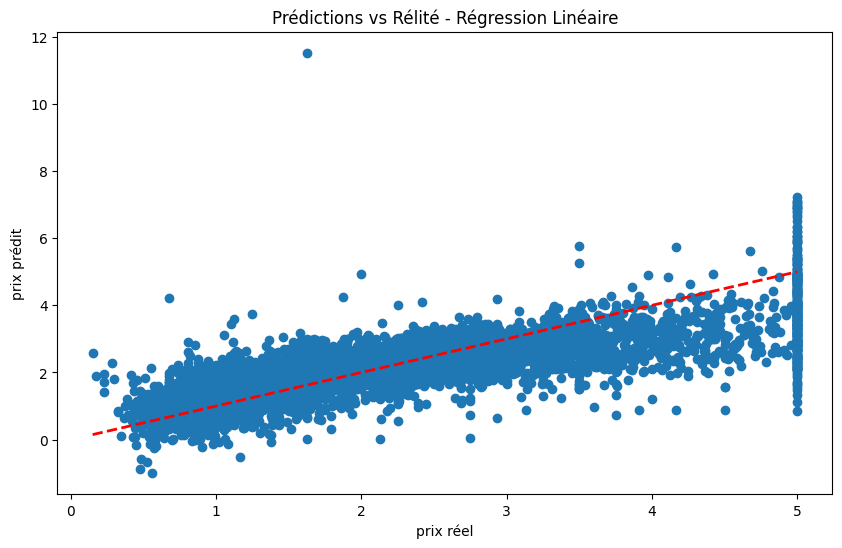

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

# Charger le dataset Boston Housing
california = fetch_california_housing()
X = california.data
y = california.target

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle de régression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

# Prédictions
y_pred = regressor.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Erreur quadratique moyenne: {mse}")
print(f"Score R²: {r2}")

# Visualisation des prédictions vs réalité
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel("prix réel")
plt.ylabel("prix prédit")
plt.title("Prédictions vs Rélité - Régression Linéaire")
plt.show()